# Project Group - 22

Members: Charlotte Koning, Cleo Vos, Koen Awater, Jasmijn van de Kar, Jippo Steenstra

Student numbers: 5414164, 5324599, 5416493, 5315611, 5064740

# Introduction

Every five years, SAIL Amsterdam attracts millions of visitors to the city’s waterfront for one of the world’s largest tall ship events. The celebration showcases the Netherlands’ maritime heritage and historic fleets. A massive event like this poses significant logistical challenges: large, fluctuating and not easily predictable pedestrian flows must be managed without compromising safety or the functioning of surrounding transport systems. Therefore, anticipating where and when peaks occur is crucial for maintaining public safety and accessibility.

This project investigates to what extent anomalous peaks in pedestrian flow can be predicted up to 15 minutes in advance using historical sensor data and temporal features. We develop and evaluate machine-learning approaches, such as XGBoost and Random Forest, to deliver short-horizon alerts of impending anomalies.

The report documents the full pipeline, from data selection and preprocessing to model training and evaluation and assesses which method gives the most accurate and timely anomaly predictions. The findings aim to support a data-driven operational workflow for real-time crowd monitoring which coulf have been used during SAIL 2025, helping authorities optimize staffing, steer pedestrian routing and reduce overcrowding risk. The results will contribute to a more data-driven and resilient approach to crowd management for SAIL's next edition and similar large-scale public events.

# Data Used

The data used for this project was obtained from the faculty, called 'SAIL2025_LVMA_data_3min_20August-25August2025_flow.csv' and 'sensor-location.xlsx'. 

All figures and graphs that are used in the report, are created based on the provided data.

The dataset exhibits a clear daily cycle, with sensors showing similar behaviour and peaks occurring at roughly the same times. Therefore, we made predictions combining multiple days for a more accurate prediction. Since the data per sensor was also behaving similarly, we filtered the data to only 3 sensors instead of 36 to give a clearer and better outline.

At sensor 1: GVCV-13_10 (Buiksloterweg ferry terminal), large numbers of visitors cross between Amsterdam North and Central Station to reach waterfront viewing areas. This site acts as a key bottleneck, suitable for analysing queuing behaviour for ferry waiting, flow efficiency, and ferry capacity during peak event hours.

Sensor 2: CMSA-GAKH-01_0 (the Kalverstraat) area represents Amsterdam’s main commercial street, where Sail visitors intersect with dense everyday shopping and touristic activity. This location enables the evaluation of sensor accuracy in crowded, mixed-use environments and offers insight into how large-scale events influence regular urban mobility.

Finally, sensor 3: CMSA-GAWW-12_295 (the Oudezijds Voorburgwal (Red Light District)) captures evening and leisure-related crowd dynamics, with fluctuating densities and narrow street layouts.

Together, these sites reflect transport, commercial, and recreational contexts, offering a representative foundation crowd flow prediction research during Sail 2025.

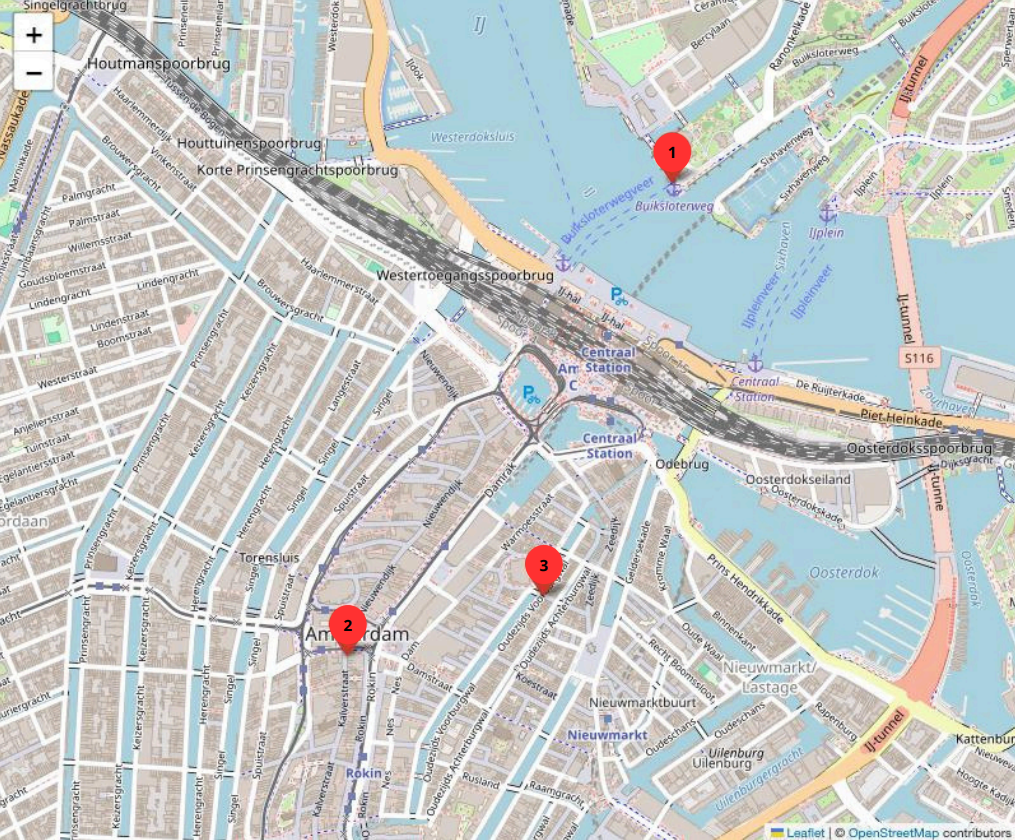

# Data Pipeline

For the geographical scale we will use Amsterdam City Center, the IJ area and a part of Amsterdam North. The temporal scale of the project will be the 20-24 august 2025. For data preperation we will use the Panda library in python.

1.⁠ ⁠Sources: How is our data source categorized and what does our data consist of? 
2.⁠ ⁠Data processing: How is our data converted to data we could use? 
3.⁠ ⁠Destination: What data is used for the making of the graphs? How can the data be used now? 

*Datafile 1: Sail crowd flows*  
\
This datafile holds the data on the crowdflows per sensor during sail. Each sensor measured the number of people passing every three minutes. 

*Data formatting*  
The data is turned into a pandas dataframe so that the file can be read and further used in python. Encoding is automatically detected with chardet. From this dataset the time features are selected and with these features a subset is made along with the selected sensors. This results in a dataset with three sensors and their time features. 

\
*Data processing*: 
From the data the averages per hour and averages per weekday are calculated. The result of this data formatting and processing is a flow-table with timefeatures and sensordata which is used for visualisatoin, peak-detection and forecasting.

Datafile 2: Sensorlocation
This datafile holds the location of each sensor. These are the sensors which are used in the the other datafile on crowdflows. 

Data formatting 
The file is an excel-file and is turned into a pandas dataframe with a chardet-encoding.

# Research Objective

Our main research question is:

To what extent can pedestrian flow be predicted and anomalous peaks be detected up to 60 minutes in advance using historical sensor data and temporal features?

To answer this research question we will look into dataset [1], the SAIL2025 LVMA pedestrian-flow dataset, which contains 3-minute resolution counts from multiple sensors across the SAIL Amsterdam event area for 20–25 August 2025. The sensor locations are specified in file [2]. Up to 60-minute-ahead forecasts are used for the results. In order to fully answer the research question, we created sub questions, listed below.  

Sub questions:
1.	How do the crowd flows differ per hour of the day and day of the week?
2.	How can anomalous crowd behaviour be quantitatively defined within the dataset?
3.	How accurately can an AI trained logistic regression model predict crowd flows?
4.  To what extent can the AI model detect anomalous peaks in the short-term forecast?


[1] 'SAIL2025_LVMA_data_3min_20August-25August2025_flow.csv'
[2] 'sensor-location.xlsx'

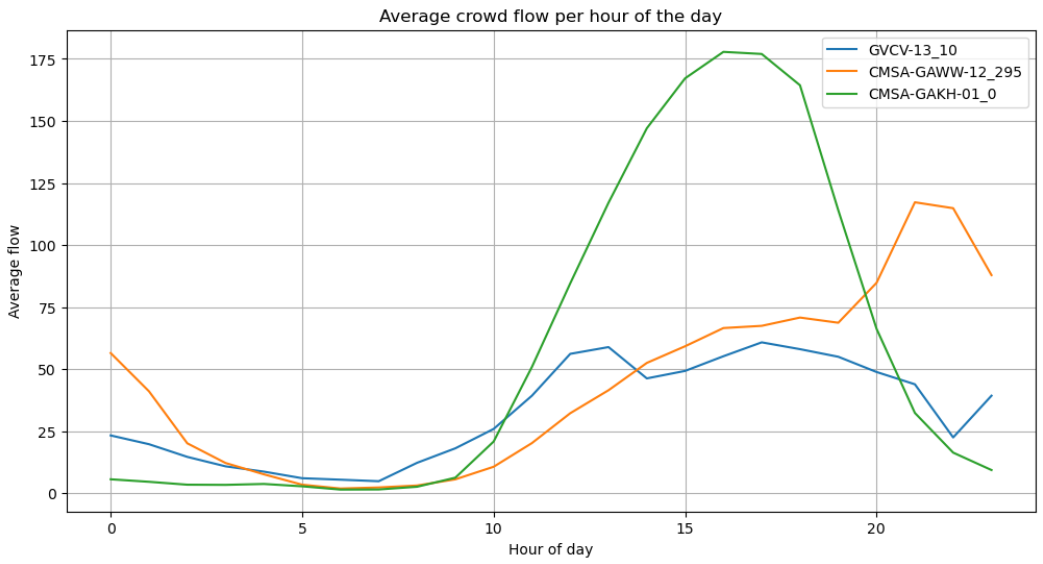
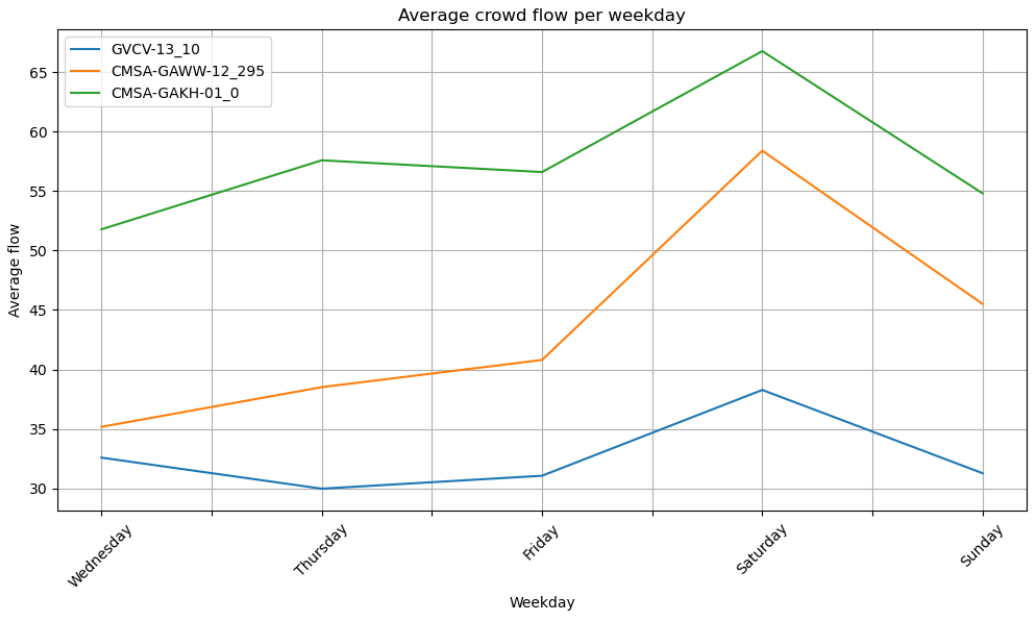

Graph 1 shows the average crowd flow per hour of the day and graph 2 displays the average crowd flow per day of the week. Both graphs display three sensors located in different areas of the SAIL event site, as explained in 'Data Used'. From the first graph, it becomes clear that the dataset exhibits a clear daily pattern, with flow levels rising sharply during late morning and afternoon hours and decreasing again in the evening. Although the absolute flow differs per location, the sensors show similar behaviour with peaks occurring at approximately the same times, indicating consistent crowd dynamics across the event area.

The second graph illustrates the average crowd flow per weekday, showing that weekend days, particularly Saturday, experience the highest activity across all sensors. This confirms that visitor intensity increases toward the weekend. This pattern aligns with the expected visitor behaviour during large-scale events, where attendance typically builds up toward the weekend as more people are off work and able to attend leisure activities.

Even though the data period is limited to five days (the lenght of the SAIL event), these patterns suggest that both time of day and day of week are strong predictors of crowd intensity. Hence, temporal features such as hour and weekday are expected to contribute significantly to the model’s ability to forecast anomalous peaks in pedestrian flow.

These insights underline the importance of incorporating temporal patterns when training predictive models, as they can help distinguish regular fluctuations from true anomalies in crowd behaviour.

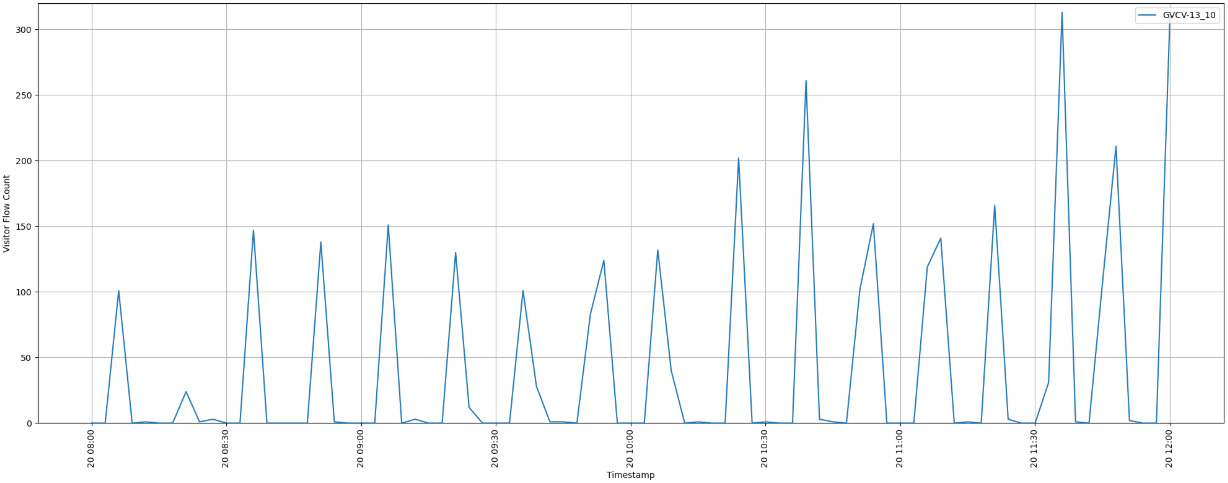
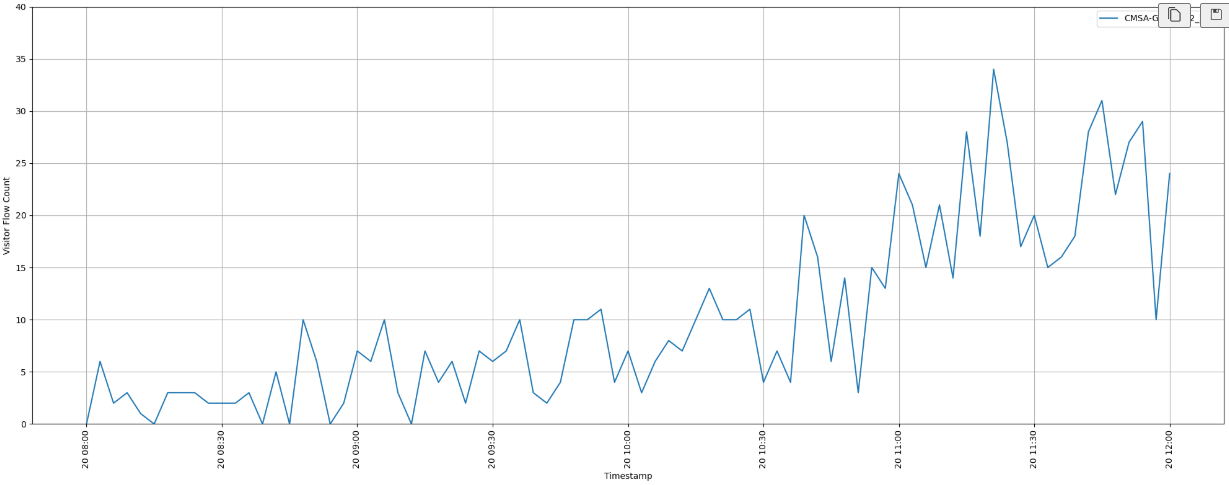
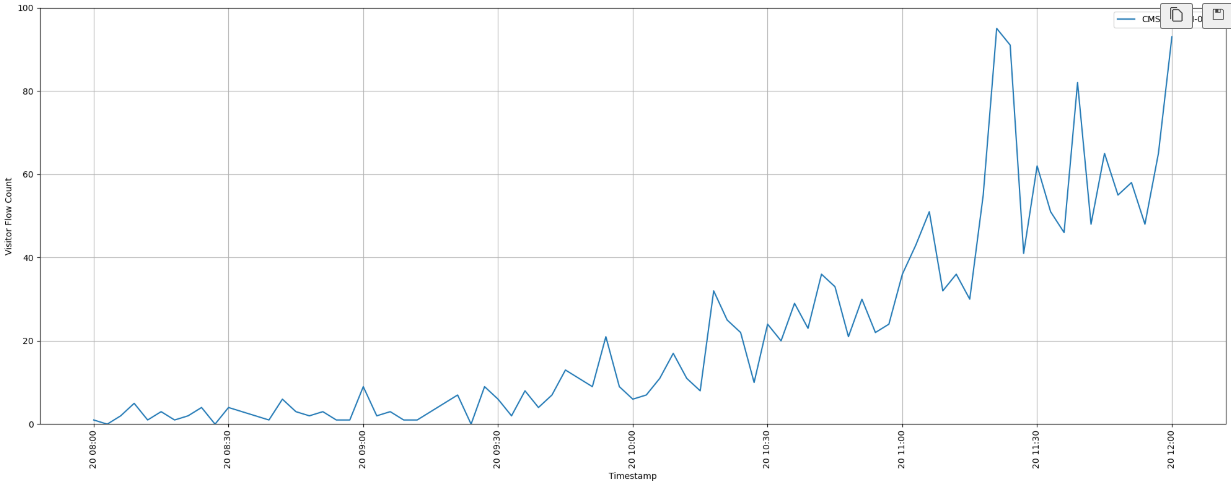

These three graphs show the trends in visitor numbers between 08:00 a.m. and 12:00 p.m. at the three different sensor locations. 

The first graph shows the crowd flow numbers for the sensor at the Buiksloterweg. The graph shows sharp peaks and drops, with short periods of high visitor numbers followed by periods of calm. This is because this location is near the ferry Buiksloterweg, where visitor flows depend heavily on the arrival and departure time of the ferries. 

The second graph shows the crowd flow numbers for the sensor at the Oudezijdse Voorburgwal. This graph shows that the visitor numbers are significantly lower than at the other two locations. But, the graph shows a similar upward trend during the morning as the other two sensor locations. 

The third graph shows the sensor at the Kalverstraat. This final graph shows how visitor numbers rise gradually throughout the morning. This indicates that crowds increase towards the midday in Amsterdam’s city centre. 



Altogether, the data shows that visitor traffic increases in the morning hours, with the Kalverstraat being the busiest location. Buiksloterweg shows fluctuating numbers due to ferry movements and compared to these two locations the Oudekenissteeg is a relatively quiet location.

# Peak Detection Approach

A rolling MAD (Median Absolute Deviation) is then used to estimate the local variability (σ), giving a robust measure of short-term noise. Points are considered significant only if they exceed ±3 × σ from the baseline:
	•	resid > +3σ → candidate peak
	•	resid < −3σ → candidate trough

Using scipy.signal.find_peaks, the algorithm marks only those points that are local maxima or minima satisfying these thresholds. Finally, any extrema closer than 6 samples apart are filtered so that only the strongest event in each cluster remains.

In summary, a peak is a point that rises more than three times the local noise above its short-term baseline and stands out as a local maximum; a trough is the mirror case below the baseline.

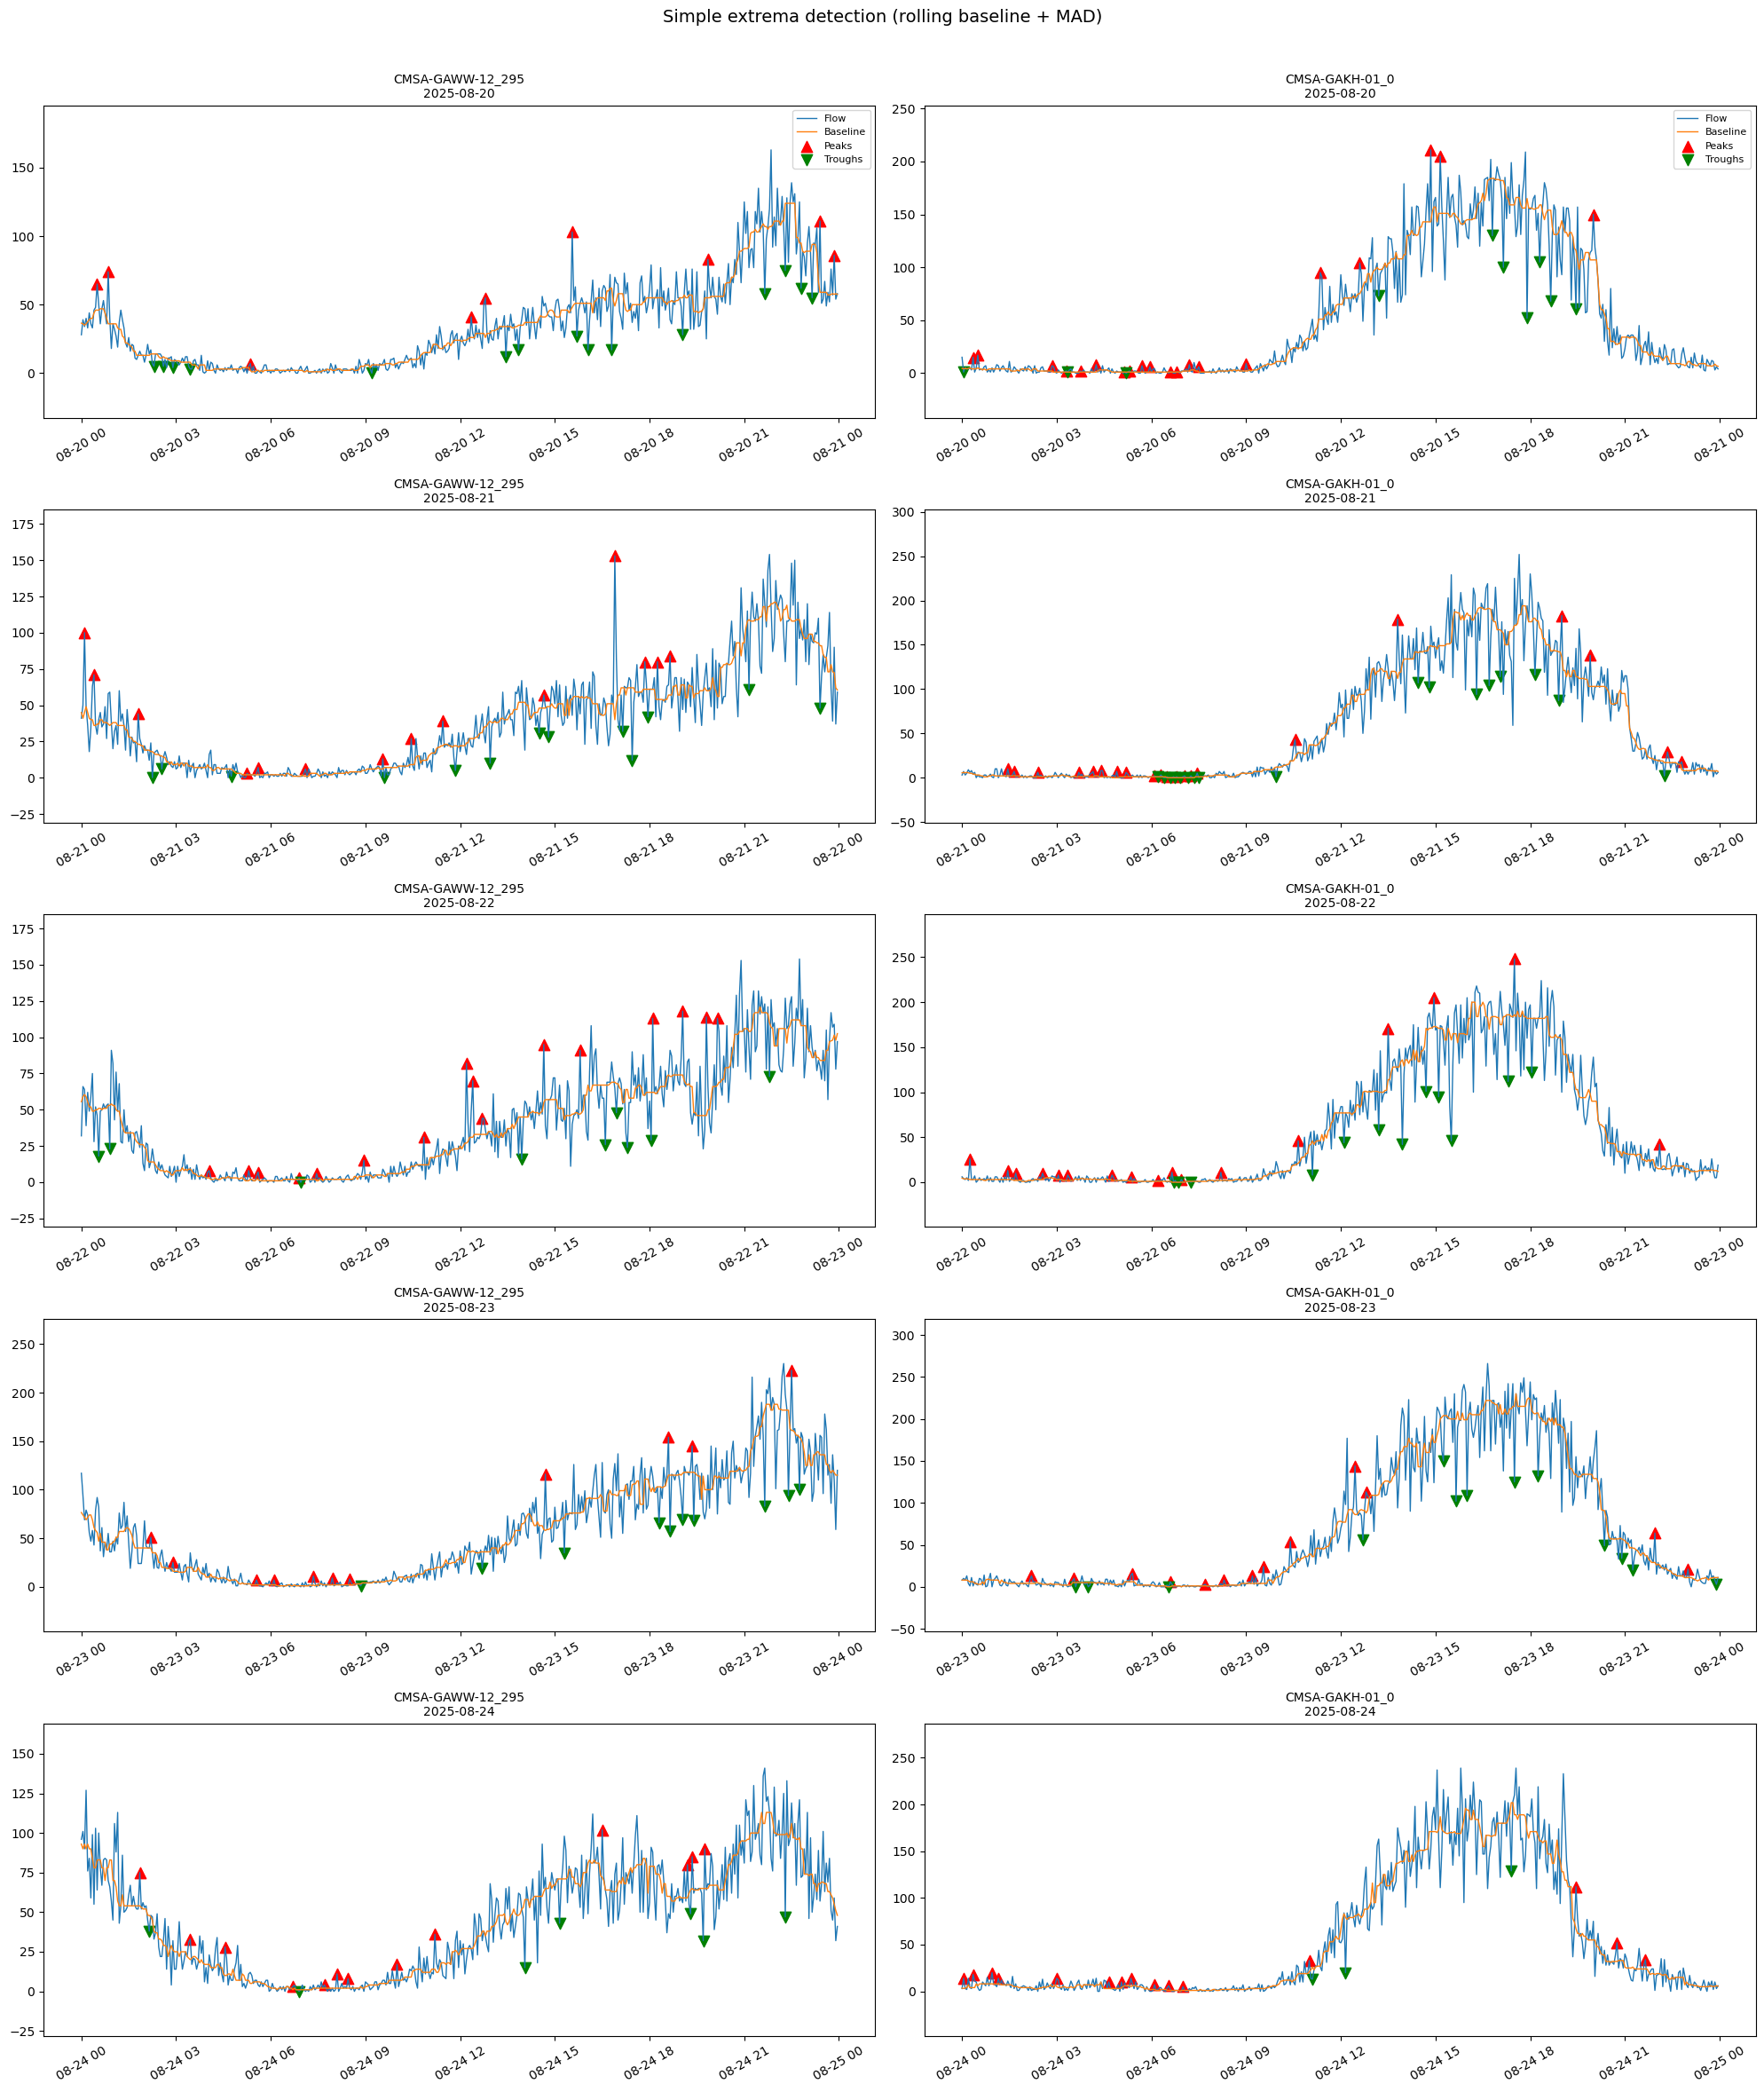

The figure above presents the detected pedestrian flow peaks for the Kalverstraat and Oudezijds Voorburgwal sensors during the five event days. Each subplot shows the measured flow at 3 minute resolution represented by a blue line. While the red dots indicate peak moments. The green arrows indicate valleys in flow count.

The plots reveal several notable patterns. All sensors display a daily rhythm, with low activity during the morning hours and increasing pedestrian volumes throughout the afternoon and evening. The peaks occur around similar times on multiple days. Indicating recurring crowd flows, which may be linked to the scheduled events. Furthermore, the sensor at Kalverstraat consistently records higher and more freqeunt peaks than the sensor at Oudezijds Voorburgwal. This suggests that it is located at a more prominent location, experiencing heavier pedestrian volumes. This aligns with our predictions that the Kalverstraat may experience higher flow counts since it is also a place for shopping and regular tourism. The Oudezijdse Voorburgwal sensor shows more crowdflow in de late evening/early morning, which also aligns with expectations since its located in the heart of the Red Light District.

The plots of the Kalverstraat show peaks in the early morning/late evening. This is caused by the rolling MAD method since the baseline is close to 0 since there is almost no crowdflow, resulting in peak detection even though these are not significant peaks.

Despite daily variations, the algorithm reliably identifies peaks. Showing that the method works well across different sensors and days apart from the early morning/late evening in the Kalverstraat.  Overall, this visualisation validates the rolling MAD (Median Absolute Deviation) approach for identifying peaks works good, confirming that the dataset captures meaningful pedestrian flow peaks suitable for predictive modeling.

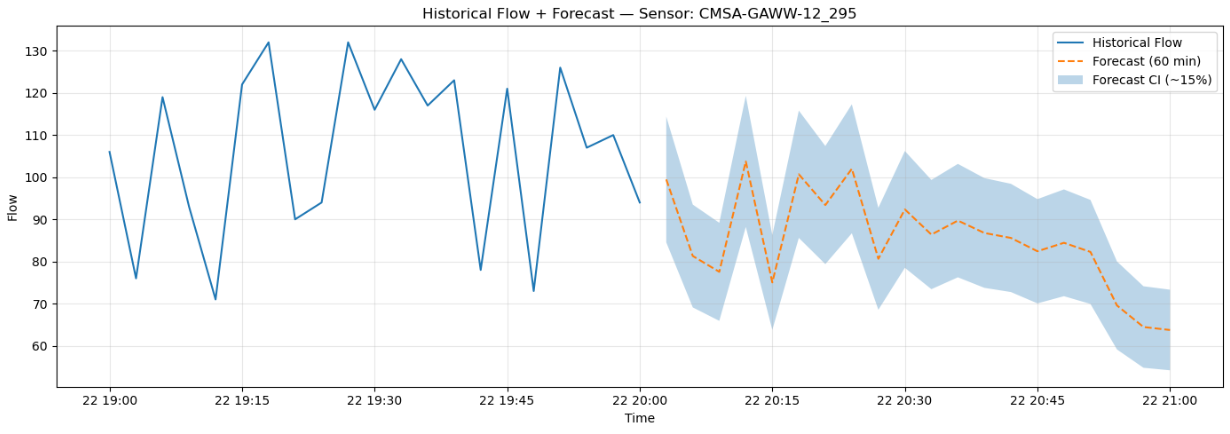

This figure shows the model’s forecast of how many people are expected to pass the sensor during the next hour. The model makes step-by-step predictions based on previous data. To do this, it uses time-based features such as the hour of the day and the day of the week, together with recent patterns in the flow. These include the last few measurements, rolling averages, and measures of variability that help the model understand the (recent) crowd flow behavior.

The forecasting model is based on gradient boosting with a Poisson loss function, which is commonly used for count data that often includes sudden peaks. Each new forecast value is generated using the model’s previous predictions, meaning that small errors can accumulate over time. This is a challenge in time-series forecasting.

The dashed line shows the predicted number of people per time step, and the shaded band represents a 15% confidence interval. This gives an impression of the expected uncertainty around the forecast. Although crowd movements can change rapidly and unpredictably, the model captures recurring daily patterns and precicts a somewhat realistic trend.

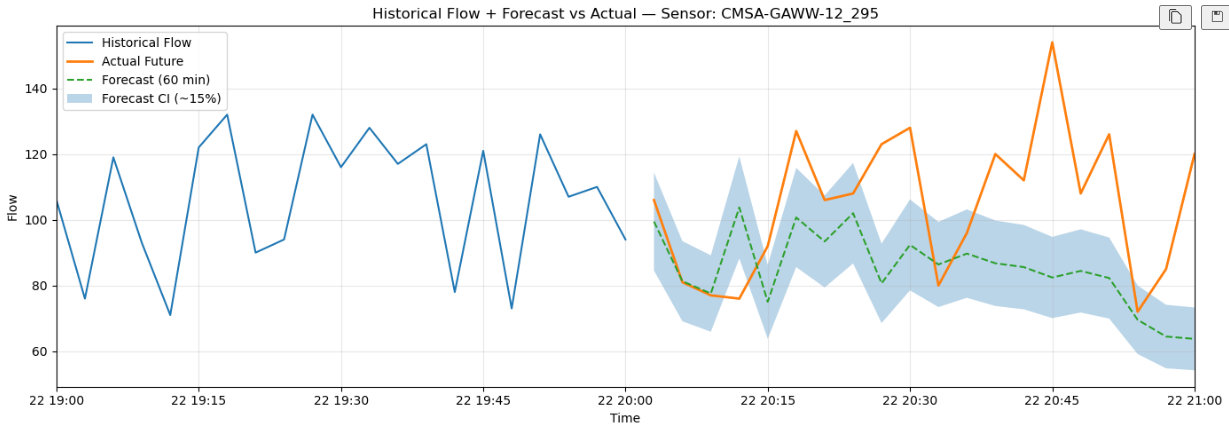

This figure compares the model’s one-hour-ahead forecast with the actual observed data from the sensor. This is the same prediction as in the previous figure, but now the real crowd counts are plotted alongside the forecast to evaluate its performance.

The comparison shows that although the forecast is not perfectly accurate, it generally follows the same trend as the real data. When the actual crowd flow increases or decreases, the model usually reacts in the same direction, showing that it has learned basic time patterns from the data. However, in the second half of the prediction (the last 30 minutes), the forecast becomes less accurate and starts to drop while the real crowd flow stays relatively stable. This shows that the model can capture short-term changes quite well, but possibly struggles to maintain accuracy over longer forecast periods.

Moreover, the forecast still struggles to anticipate sudden changes, such as unexpected surges or drops in the number of people passing the sensor. This is typical for highly dynamic systems like crowd movement, where external factors play a major role.
Overall, the visualization highlights both the potential of the model to provide realistic short-term forecasts and the limitations that come with predicting such complex, dynamic patterns.

# Conclusion

This project explored the feasibility of how pedestrian flow can be predicted and detecting anomalous peaks at SAIL Amsterdam 2025. While using sensor data and applying machine learning models. The results provide a useful first step for high level crowd prediction. 

The daily and weekly movements patterns were captured, by analysing the historical data at the three different sensor locations. The crowd flows exhibit strong temporal patterns, which confirm that time of day and day of the week are key predictors for the activity of pedestrians. 

The model captured broad trends but struggled with fluctuations. It performed well predicting the general flow but failed to anticipate sudden and detailed peaks. This indicated that simple linear models are insufficient for accurate precise crowd flow forecasting. Suggesting the need for more advanced models such as XGBoost or LSTMs.

The model could identify general high activity periods but was inconsistent in detecting anomalous peaks. Many sudden peaks were missed or underestimated. Therefore, while the model offers insights of potential busy moments it is not suitable for dependable crowd planning.

The results provide a solid baseline for understanding and predicting broad pedestrian flow patterns. However, short term anomalous peak detection requires more data and more advanced modelling techniques to produce accurate results. Then it can be used to make real-time crowd-management decisions.

# Discussion

The results demonstrate that the forecasting model can capture general patterns in crowd movement but also shows its limitations. While it predicts short-term crowd flow reasonably well, accuracy for anomalous peaks is not that high. This is probably due to the limited input data, which only reflect time-related patterns and recent observations. It does not take the other real-world factors into account that can drive crowd behavior.

To improve predictive performance, the model could be extended with additional data sources such as vessel positions, public transport schedules, weather data, and TomTom traffic information. This data could help the model anticipate changes linked to actual events and conditions. These external signals could make the forecasts more responsive and accurate.

Another improvement lies in using a more powerful AI model. While Gradient Boosting works well for non-linear relationships, it does not explicitly model temporal dependencies. Advanced models like Recurrent Neural Networks (RNNs), LSTMs, or Temporal Convolutional Networks (TCNs) could better capture patterns in crowd dynamics, though they would require more data and computational resources.

A third possible improvement is to let the model predict crowd peaks more directly. Right now, sudden spikes in crowd numbers are treated as random outliers. In the future, the model could instead estimate how likely a peak is to occur and how large it might be. This could make the forecasts more useful.

Overall, the project shows that machine learning can produce realistic short-term forecasts of crowd flow, but also highlights clear directions for improvement. Combining more datasets, more advanced models, and explicit peak modeling would make the forecasts both more accurate and more useful for practical crow flow managament and policy-making.

# Contribution Statement